#Task A - A first motivating example

##A1 & A2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

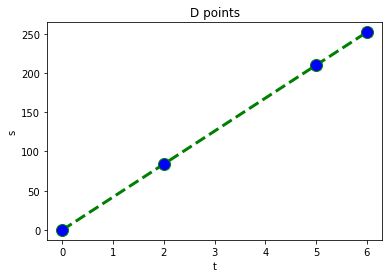

In [2]:
# observed values
t_obs = [0, 2, 5, 6]
s_obs = [0, 84, 210, 252]

plt.plot(t_obs, s_obs, color='green', linestyle='dashed', linewidth=3,
         marker='o', markerfacecolor='blue', markersize=12)

plt.xlabel('t')
plt.ylabel('s')
plt.title('D points')
plt.show()

##A3

s=v*t

v=0 -> s=0

v=35 -> s=35*t

v=42 -> s=42*t

In [3]:
def s(v,t):
  s=v*t
  return s

In [4]:
t = np.array(t_obs)
v_list = [0, 35, 42]

#initialize 4x3 matrix for storing s values (t: row, v: column)
s_matrix = np.zeros((len(t), len(v_list)))

for j in range(len(v_list)):
  s_matrix[:,j] = s(v_list[j],t)
print(s_matrix)

[[  0.   0.   0.]
 [  0.  70.  84.]
 [  0. 175. 210.]
 [  0. 210. 252.]]


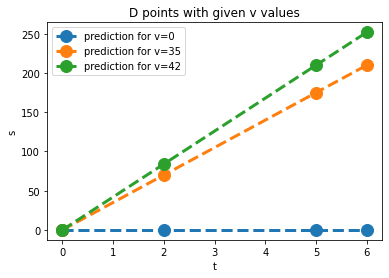

In [5]:
n_rows, n_cols = s_matrix.shape
for j in range(n_cols):
  plt.plot(t, s_matrix[:,j], linestyle='dashed', linewidth=3,
         marker='o', markersize=12, label=f'prediction for v={v_list[j]}')

plt.title('D points with given v values')
plt.xlabel('t')
plt.ylabel('s')
plt.legend()
plt.show()

##A4

In [6]:
def J(s_obs, s_pred):
  return np.mean((s_obs-s_pred)**2)

In [7]:
for j in range(n_cols):
  print(f'J(v={v_list[j]}) = {J(s_obs, s_matrix[:,j])}')

J(v=0) = 28665.0
J(v=35) = 796.25
J(v=42) = 0.0


As we increase v (the slope of the function), we get closer to the real function.

##A5

In [8]:
def J_grad(v, t_obs, s_obs):
  return np.median(-2*t_obs*(s_obs-v*t_obs))

##A6

In [9]:
nr_steps = 3
eta = 0.01 # learning rate
v = 10 # initial guess
  
for i in range(1, nr_steps+1):
    v -= eta * J_grad(v, np.array(t_obs), np.array(s_obs))
    print(f'v(i={i})={round(v, 2)}')

v(i=1)=19.28
v(i=2)=25.87
v(i=3)=30.55


If we had more iterations, the value of v would keep increasing until reaching the value of 42. We saw previously that for v=42 we get a loss of 0, which is the minimum since the function can't have negative values.

#Task B - Fitting linear models with Numpy and PyTorch

##Problem B1: Explain Numpy based code

In [10]:
import numpy as np

#Generate 10 training examples and a constant add bias to the X matrix
N=10
a_true = 4.0
b_true = 3.0

X = 2 * np.random.rand(N, 1)
y = a_true*X + b_true
X_b=np.column_stack([np.ones((N, 1)), X]) # add x0 = 1 to each instance as first column

eta = 0.1 # learning rate
n_iterations = 300

a0 = 1.0
b0 = 1.0
w = np.array([[b0],[a0]]) # np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
  grad = 2/N * X_b.T.dot(X_b.dot(w) - y) # Q....
  w = w - eta * grad

w_from_np=w
print(w_from_np)

[[3.0003398]
 [3.9997481]]


We start by defining a linear function with its real parameters. We have generated a random sample of X with 10 numbers ranging from 0 to 1. We have calculated the output with the randomly generated X values, then created the input matrix. Then, we choose an initial guess for the parameters. Then, we apply the gradient descent to the loss function, which we wanna minimize. The loss function is the mean of the sum of squared diferences between the prediciton and the real output.

##Problem B2: Explain PyTorch based code

In [11]:
import torch
from torch import autograd

N=10
a_true = 4.0
b_true = 3.0

X = 2 * torch.randn(N, 1)
y_obs = a_true*X + b_true

def my_linear_model(X, w):
  a = w[0]
  b = w[1]
  return a*X + b

def my_l2_loss_function(y_pred, y_true):
  return torch.pow(y_true - y_pred, 2.0)

def my_cost_function(y_pred, y_true):
  loss_over_data = my_l2_loss_function(y_pred, y_true)
  return torch.mean(loss_over_data)

eta = 0.01 # 'learning rate aka step-size'
n_iterations = 300 # Nr. GD iterations
w_pt = torch.randn(size=[2], requires_grad=True) # Param Init

for iteration_i in range(n_iterations):
  y_preds = my_linear_model(X, w_pt)

  cost = my_cost_function(y_preds, y_obs)

  cost.backward()

  with torch.no_grad():
    w_pt -= eta*w_pt.grad

  w_pt.grad.zero_()

w_from_PyTorch = w_pt.detach().numpy()
w_from_PyTorch

array([3.9994168, 2.9946141], dtype=float32)

We are doing the same as in the previous code but using pytorch. In this case, we define the parameters, the input and the output in tensors instead of arrays. Instead of defining the gradient of the loss function in the gradient descent loop, we define the loss function outside the loop and the gradient is calculated in the loop using auto-differentiation.

##Problem B3: Compare Numpy and PyTorch based results

The output seems to converge to the same values but the order is different, this is because the models have been define differently.

#Task C - Some Common/Useful 1D Parameteric Models

##Problem C1: Make one graph per parameter for models 1-7

In [12]:
def linear_model(x, w):
    a = w[0]
    b = w[1]
    return a*x + b

In [13]:
def quadratic_model(x, w):
    a = w[0]
    b = w[1]
    return torch.pow((x-a), 2) + b

In [14]:
def michaelis_menten_model(x, w):
    a = w[0]
    b = w[1]
    if all(a >= 0 and b >= 0 and x >= 0):
      return (a*x)/(b+x)
    else:
      print("function is not defined")

In [15]:
def arrhenius_model(x, w):
    a=w[0]
    b=w[1]
    if all(a>=0 and b>=0 and x>=0):
      return a*torch.exp(-b/x)
    else:
      print("function is not defined")

In [16]:
def bell_curve_model(x, w):
    a=w[0]
    m=w[1]
    v=w[2]
    if v > 0:
      return a*torch.exp(-(torch.pow(x-m,2)/v))
    else:
      print("function is not defined")

In [17]:
#sum of two bell curves
def bimodal_model(x, w):
    a1, a2 =w[0, :]
    m1, m2 =w[1, :]
    v1, v2 = w[2, :]
    if v1 > 0 and v2 > 0:
      return a1*torch.exp(-(torch.pow(x-m1 ,2)/v1)) + a2*torch.exp(-(torch.pow(x-m2, 2)/v2))
    else:
      print("function is not defined")

In [18]:
def nerve_cell_model(x, w):
    a = w[0]
    b = w[1]
    return 1/(1+torch.exp(-a*(x-b)))

In [19]:
def plot_model_ab(model_name, model_function, x_plot, w1, w2=None, w3=None, w4=None, w5=None):
  
  fig, ax = plt.subplots()
  fig.set_size_inches(8, 6)

  ax.plot(x_plot, model_function(x_plot, w1), label=f'a={w1[0]}, b={w1[1]}')
  if w2 is not None:
    ax.plot(x_plot, model_function(x_plot, w2), label=f'a={w2[0]}, b={w2[1]}')
  if w3 is not None:
    ax.plot(x_plot, model_function(x_plot, w3), label=f'a={w3[0]}, b={w3[1]}')
  if w4 is not None:
    ax.plot(x_plot, model_function(x_plot, w4), label=f'a={w4[0]}, b={w4[1]}')
  if w5 is not None:
    ax.plot(x_plot, model_function(x_plot, w5), label=f'a={w5[0]}, b={w5[1]}')

  ax.set_title(model_name + ' model')
  ax.set_xlabel('x')
  ax.set_ylabel('f(x)')

  plt.legend()
  plt.grid()
  plt.show()

In [20]:
def plot_model_amv(model_name, model_function, x_plot, w1, w2=None, w3=None, w4=None, w5=None):
  
  fig, ax = plt.subplots()
  fig.set_size_inches(8, 6)

  try:
    n_cols = w1.shape[1] # we get n_cols=2 for bimodal case
  except:
    n_cols = 1 # shape method doesn't work for 1D tensor

  if n_cols == 1: #case for one mode
    ax.plot(x_plot, model_function(x_plot, w1), label=f'a={w1[0]}, m={w1[1]}, v={w1[2]}')
    if w2 is not None:
      ax.plot(x_plot, model_function(x_plot, w2), label=f'a={w2[0]}, m={w2[1]}, v={w2[2]}')
    if w3 is not None:
      ax.plot(x_plot, model_function(x_plot, w3), label=f'a={w3[0]}, m={w3[1]}, v={w3[2]}')
    if w4 is not None:
      ax.plot(x_plot, model_function(x_plot, w4), label=f'a={w4[0]}, m={w4[1]}, v={w4[2]}')
    if w5 is not None:
      ax.plot(x_plot, model_function(x_plot, w5), label=f'a={w5[0]}, m={w5[1]}, v={w5[2]}')

  elif n_cols == 2: #case for two modes
    ax.plot(x_plot, model_function(x_plot, w1),
            label=f'a1={w1[0, 0]}, m1={w1[1, 0]}, v1={w1[2, 0]}\na2={w1[0, 1]}, m2={w1[1, 1]}, v2={w1[2, 1]}')
    if w2 is not None:
      ax.plot(x_plot, model_function(x_plot, w2),
              label=f'a1={w2[0, 0]}, m1={w2[1, 0]}, v1={w2[2, 0]}\na2={w2[0, 1]}, m2={w2[1, 1]}, v2={w2[2, 1]}')
    if w3 is not None:
      ax.plot(x_plot, model_function(x_plot, w3),
              label=f'a1={w3[0, 0]}, m1={w3[1, 0]}, v1={w3[2, 0]}\na2={w3[0, 1]}, m2={w3[1, 1]}, v2={w3[2, 1]}')
    if w4 is not None:
      ax.plot(x_plot, model_function(x_plot, w4),
              label=f'a1={w4[0, 0]}, m1={w4[1, 0]}, v1={w4[2, 0]}\na2={w4[0, 1]}, m2={w4[1, 1]}, v2={w4[2, 1]}')
    if w5 is not None:
      ax.plot(x_plot, model_function(x_plot, w5),
              label=f'a1={w5[0, 0]}, m1={w5[1, 0]}, v1={w5[2, 0]}\na2={w5[0, 1]}, m2={w5[1, 1]}, v2={w5[2, 1]}')

  ax.set_title(model_name + ' model')
  ax.set_xlabel('x')
  ax.set_ylabel('f(x)')

  plt.legend()
  plt.grid()
  plt.show()

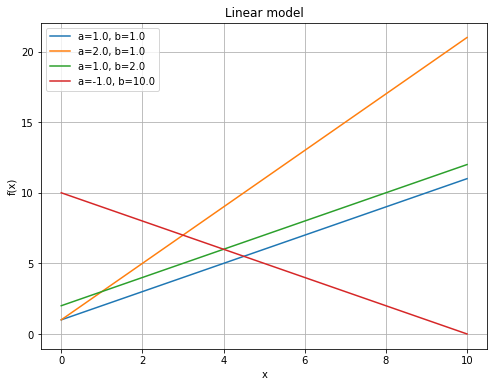

In [21]:
# Plot for linear model
x = torch.linspace(start=0, end=10, steps=100)
w1 = torch.tensor([1.0, 1.0])
w2 = torch.tensor([2.0, 1.0])
w3 = torch.tensor([1.0, 2.0])
w4 = torch.tensor([-1.0, 10.0])
plot_model_ab('Linear', linear_model, x, w1, w2, w3, w4)

a: slope

b: vertical offset

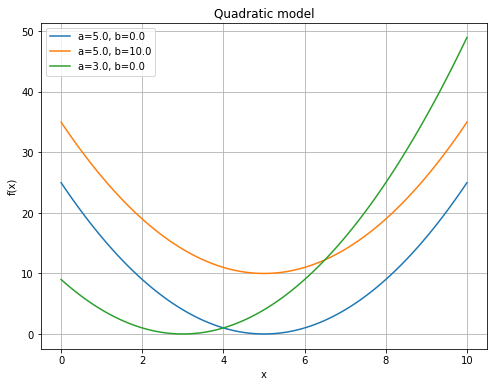

In [22]:
#Plot for quadratic model
x = torch.linspace(start=0, end=10, steps=100)
w1 = torch.tensor([5.0, 0.0])
w2 = torch.tensor([5.0, 10.0])
w3 = torch.tensor([3.0, 0.0])
plot_model_ab('Quadratic', quadratic_model, x, w1, w2, w3)

a: horizontal offset

b: vertical offset


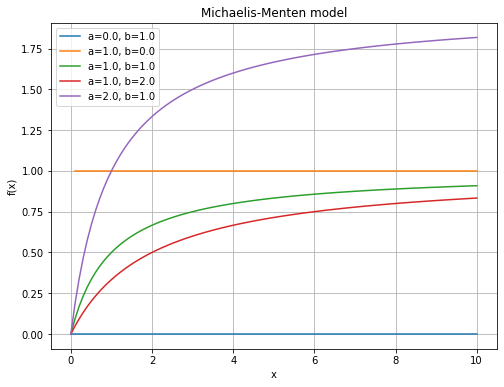

In [23]:
#Plot for Michaelis-Menten model
x = torch.linspace(start=0, end=10, steps=100)
w1 = torch.tensor([0.0, 1.0])
w2 = torch.tensor([1.0, 0.0])
w3 = torch.tensor([1.0, 1.0])
w4 = torch.tensor([1.0, 2.0])
w5 = torch.tensor([2.0, 1.0])
plot_model_ab('Michaelis-Menten', michaelis_menten_model, x, w1, w2, w3, w4, w5)

a: amplitud

b: curvature

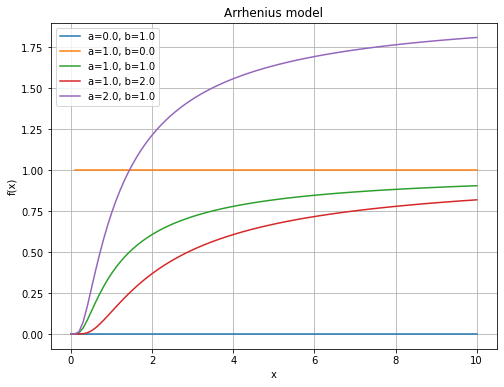

In [24]:
#Plot for Arrhenius model
x = torch.linspace(start=0, end=10, steps=100)
w1 = torch.tensor([0.0, 1.0])
w2 = torch.tensor([1.0, 0.0])
w3 = torch.tensor([1.0, 1.0])
w4 = torch.tensor([1.0, 2.0])
w5 = torch.tensor([2.0, 1.0])
plot_model_ab('Arrhenius', arrhenius_model, x, w1, w2, w3, w4, w5)

a: amplitud

b: curvature

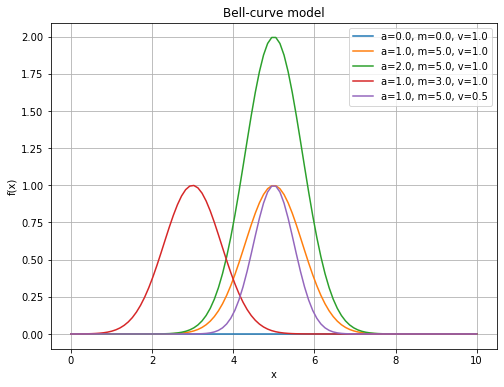

In [25]:
#Plot for bell-curve model
x = torch.linspace(start=0, end=10, steps=100)
w1 = torch.tensor([0.0, 0.0, 1.0])
w2 = torch.tensor([1.0, 5.0, 1.0])
w3 = torch.tensor([2.0, 5.0, 1.0])
w4 = torch.tensor([1.0, 3.0, 1.0])
w5 = torch.tensor([1.0, 5.0, 0.5])
plot_model_amv('Bell-curve', bell_curve_model, x, w1, w2, w3, w4, w5)

a: amplify bell (size)

m: horizontal offset (mean)

v: width of the bell (std deviation)

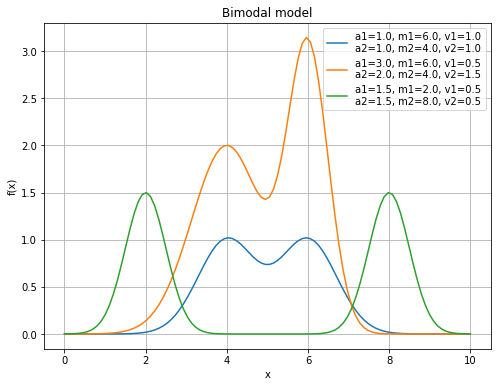

In [26]:
#Plot for bimodal model
x = torch.linspace(start=0, end=10, steps=100)
w1 = torch.tensor([[1.0, 1.0], [6.0, 4.0], [1.0, 1.0]])
w2 = torch.tensor([[3, 2], [6.0, 4.0], [0.5, 1.5]])
w3 = torch.tensor([[1.5, 1.5], [2.0, 8.0], [0.5, 0.5]])
plot_model_amv('Bimodal', bimodal_model, x, w1, w2, w3)

ai: amplify bell i

mi: horizontal offset for bell i

vi: width of bell i

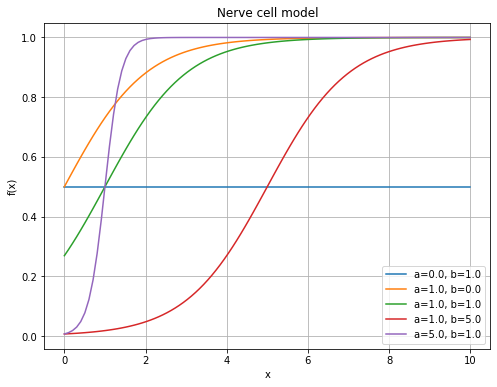

In [27]:
#Plot for nerve cell model
x = torch.linspace(start=0, end=10, steps=100)
w1 = torch.tensor([0.0, 1.0])
w2 = torch.tensor([1.0, 0.0])
w3 = torch.tensor([1.0, 1.0])
w4 = torch.tensor([1.0, 5.0])
w5 = torch.tensor([5.0, 1.0])
plot_model_ab('Nerve cell', nerve_cell_model, x, w1, w2, w3, w4, w5)

a: slope

b: horizontal offset

##Problem C2: Parameter guessing based on visual inspection

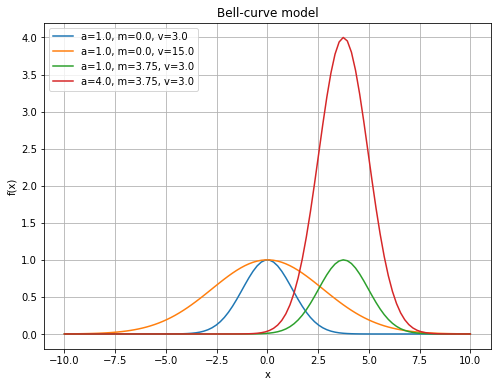

In [28]:
#Plot for figure 3
x = torch.linspace(start=-10, end=10, steps=100)
#a: height (y_axis) m:x2 v:x1
w1 = torch.tensor([1.0, 0.0, 3.0])
w2 = torch.tensor([1.0, 0.0, 15.0])
w3 = torch.tensor([1.0, 3.75, 3.0])
w4 = torch.tensor([4.0, 3.75, 3.0])
plot_model_amv('Bell-curve', bell_curve_model, x, w1, w2, w3, w4)

##Problem C3: Model guessing based on visual inspection

**Part A**

1. Dataset A: Bell curve with a=2.25 m=11.5 v=4.5

2. Dataset B: Quadratic with a=3.5 b=1

3. Dataset C: Arrhenius with a=6 b=1 OR Michaelis Menten with a=6 b=1

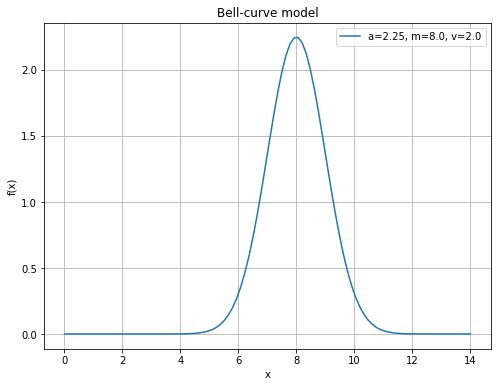

In [29]:
#Plot for Dataset A: bell-curve model
x = torch.linspace(start=0, end=14, steps=100)
w1 = torch.tensor([2.25, 8.0, 2.0])
plot_model_amv('Bell-curve', bell_curve_model, x, w1)

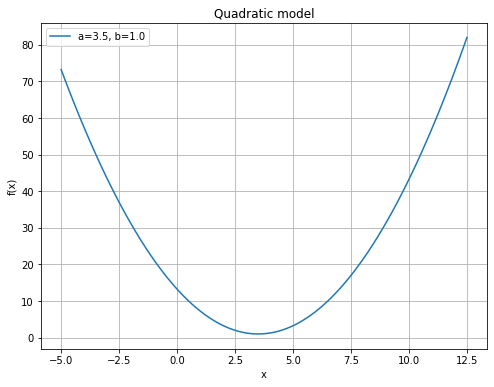

In [30]:
#Plot for Dataset B: quadratic model
x = torch.linspace(start=-5, end=12.5, steps=100)
w1 = torch.tensor([3.5, 1])
plot_model_ab('Quadratic', quadratic_model, x, w1)

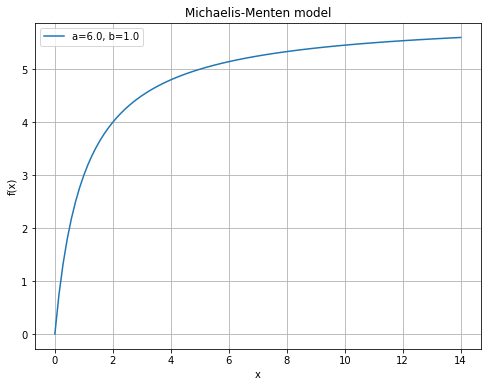

In [31]:
#Plot for Dataset C
x = torch.linspace(start=0, end=14, steps=100)
w1 = torch.tensor([6.0, 1.0])
plot_model_ab('Michaelis-Menten', michaelis_menten_model, x, w1)

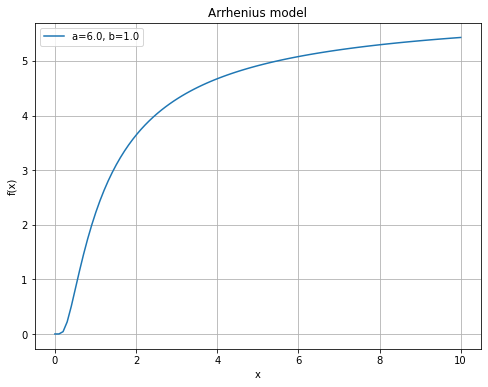

In [32]:
#Plot for Dataset C
x = torch.linspace(start=0, end=10, steps=100)
w1 = torch.tensor([6.0, 1.0])
plot_model_ab('Arrhenius', arrhenius_model, x, w1)

Bell curve is being used for the normal distribution (i.e. performance management, height of the people in a population, income level and so on).

Menten equation is being used to characterize the enzymatic rate at different substrate concentrations. x: substrate (mM) y: reaction rate (s^-1)

x:0.3 y:55 for the the substrate methyl-FLIP.

Quadratic model can be used for maximization of revenue for a product given the range of the price. x:price y:revenue 

x:30 y:2.500.000

Another example for the quadratic model is throwing a ball. Given that the ball is 3 m above the ground, with a velocity of 14 m/s, we can calculate when it hits the ground (ignoring the air resistance). h = 3 + 14t − 5t^2; t=3

#Task D - Gradient Descent based fitting of parameters of predictive models

##Problem D1: A Linear Regression - The SteelAI Case

In [33]:
import pandas as pd

In [34]:
# Connect drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Import dataset as dataframe
DATA_PATH = '/content/drive/My Drive/datasets/dataset_SteelAI.csv'
df = pd.read_csv(DATA_PATH)

In [36]:
# Check data
df.head()

,x,y
0,0.057456,0.176659
1,0.186633,0.288703
2,0.131318,0.215888
3,0.235608,0.344166
4,0.233993,0.290388


In [37]:
# Random subset of the dataset
df_sub = df.sample(frac=0.8)

In [38]:
# Get x and y columns
x = df_sub['x']
y = df_sub['y']

In [39]:
# Convert x and y to tensors
x = torch.tensor(x.values)
y = torch.tensor(y.values)

In [40]:
def loss_function(y_pred, y_true): # compute squared error
  return torch.pow(y_pred-y_true, 2)

In [41]:
def cost_function(y_pred, y_true): # compute mean squared error
  return torch.mean(loss_function(y_pred, y_true))

In [42]:
def gradient_descent(model_function, param1, param2, eta, max_iter, min_step_length):

  # define initial guess
  w = torch.tensor([param1, param2], requires_grad=True)

  # store cost value for each iteration
  cost_values = []

  for i in range(1, max_iter+1):

    y_pred = model_function(x, w)

    cost = cost_function(y_pred, y)
    cost_values.append(cost.item())

    cost.backward()

    with torch.no_grad():
      step_length = eta*w.grad
      w -= step_length

    w.grad.zero_()

    if torch.norm(step_length) <= min_step_length:
      print(f'Solution converged after {i} iterations')
      break

  if i == max_iter:
    print(f'Maximum number of iteration reached: {max_iter}')
    
  print(f'Model parameters:\na={round(w[0].item(), 4)}\nb={round(w[1].item(), 4)}')

  return cost_values, y_pred

In [43]:
# Gradient descent for linear model
max_iter = 5000
eta = 0.1 # learning rate
min_step_length = 0.001 # stop criteria
a = 1.0 # initial guess component 1
b = 1.0 # initial guess component 2
cost_values, y_pred = gradient_descent(linear_model, a, b, eta, max_iter, min_step_length)

Solution converged after 24 iterations
Model parameters:
a=0.8565
b=0.095


Results obtained in different runs using a random subset of the dataset:

1) a=0,8571 b=0,0944

2) a=0,851  b=0,0958

3) a=0,8595 b=0,0974

The parameters have similar values using different subsets, therefore, we can say that the model is robust.

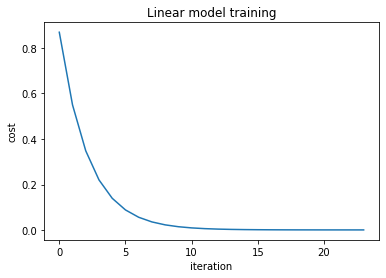

Final cost value: 0.001473


In [44]:
plt.plot(cost_values)
plt.title('Linear model training')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()
print(f'Final cost value: {round(cost_values[-1], 6)}')

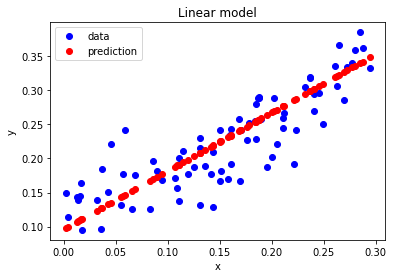

In [45]:
plt.plot(x, y, 'bo', label='data')
plt.plot(x, y_pred.detach().numpy(), 'ro', label='prediction')
plt.title('Linear model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

##Problem D2: Fitting parameters to a non-linear relationship

In [46]:
# Import dataset as dataframe
DATA_PATH = '/content/drive/My Drive/datasets/dataset_Marvin_Minsky.csv'
df = pd.read_csv(DATA_PATH)

In [47]:
# Check data
df.head()

,x,y
0,44.534092,2.154690
1,17.457317,1.831702
2,40.618217,2.135448
3,67.102280,2.368806
4,11.144817,1.264841


In [48]:
# Random subset of the dataset
df_sub = df.sample(frac=0.8)

In [49]:
# Get x and y columns
x = df_sub['x']
y = df_sub['y']

In [50]:
# Convert x and y to tensors
x = torch.tensor(x.values)
y = torch.tensor(y.values)

In [51]:
# Gradient descent using Michaelis-Menten model
max_iter = 5000
eta = 0.1 # learning rate
min_step_length = 0.001 # stop criteria
a = 2.0 # initial guess component 1
b = 4.0 # initial guess component 2
mm_cost_values, mm_pred = gradient_descent(michaelis_menten_model, a, b, eta, max_iter, min_step_length)

Solution converged after 1407 iterations
Model parameters:
a=2.4989
b=5.8821


Results obtained in different runs using a random subset of the dataset:

1) a=2,47   b=5,545

2) a=2,4796 b=5,5583

3) a=2,4874 b=5,5717

The parameters have similar values using different subsets, therefore, we can say that the model is robust.

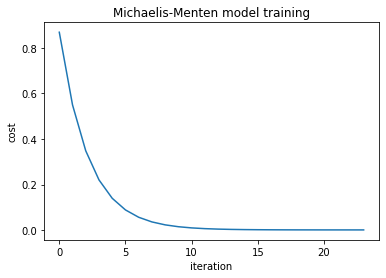

In [52]:
plt.plot(cost_values)
plt.title('Michaelis-Menten model training')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [53]:
# Gradient descent using Arrhenius model
max_iter = 5000
eta = 0.1 # learning rate
min_step_length = 0.001 # stop criteria
a = 2.0 # initial guess component 1
b = 4.0 # initial guess component 2
a_cost_values, a_pred = gradient_descent(arrhenius_model, a, b, eta, max_iter, min_step_length)

Solution converged after 809 iterations
Model parameters:
a=2.4967
b=5.079


Results obtained in different runs using a random subset of the dataset:

1) a=2,4709 b=4,8928

2) a=2,4759 b=4,8043

3) a=2,4835 b=4,8157

The parameters have similar values using different subsets, therefore, we can say that the model is robust.

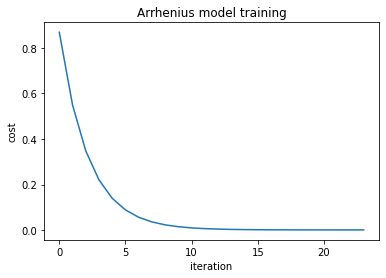

In [54]:
plt.plot(cost_values)
plt.title('Arrhenius model training')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [55]:
print(f'Final cost value for Michaelis-Menten: {round(mm_cost_values[-1], 6)}')
print(f'Final cost value for Arrhenius: {round(a_cost_values[-1], 6)}')

Final cost value for Michaelis-Menten: 0.062614
Final cost value for Arrhenius: 0.052251


Arrhenius model is performing slightly better since it has a slightly lower cost value and it converges with a smaller number of iterations

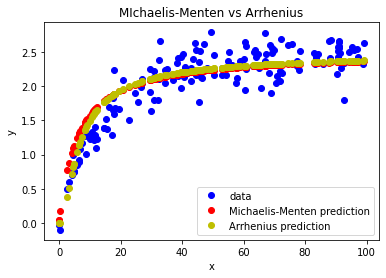

In [56]:
plt.plot(x, y, 'bo', label='data')
plt.plot(x, mm_pred.detach().numpy(), 'ro', label='Michaelis-Menten prediction')
plt.plot(x, a_pred.detach().numpy(), 'yo', label='Arrhenius prediction')
plt.title('MIchaelis-Menten vs Arrhenius')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

##Problem D3∗: Fitting parameters to a non-linear relationship using the ANN model

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
# Get x and y columns
x = df['x']
y = df['y']

In [59]:
# Scale y values
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [60]:
# Convert x and y to tensors
x = torch.tensor(x.values)
y = torch.tensor(y_scaled)

In [61]:
def neural_network_model(x, w):
  # f(x; u1, u2, b0, w1, w2, b1, b2) = fi(u1*fi(w1*x + b1) + u2*fi(w2*x + b2) + b0)
  fi = torch.sigmoid # activation function
  n1 = fi(w[3]*x + w[5]) # output neuron 1
  n2 = fi(w[4]*x + w[6]) # output neuron 2
  return fi(w[0]*n1 + w[1]*n2 + w[2])

In [62]:
max_iter = 5000
eta = 0.1 # learning rate
min_step_length = 0.0001 # stop criteria

# define random initial guess
w = torch.randn(size=[7], requires_grad=True)

# store cost value for each iteration
cost_values = []

for i in range(1, max_iter+1):

  y_pred = neural_network_model(x, w)

  cost = cost_function(y_pred, y)
  cost_values.append(cost.item())

  cost.backward()

  with torch.no_grad():
    step_length = eta*w.grad
    w -= step_length

  w.grad.zero_()

  if torch.norm(step_length) <= min_step_length:
    print(f'Solution converged after {i} iterations')
    break

if i == max_iter:
  print(f'Maximum number of iteration reached: {max_iter}')

param_names = ['u1', 'u2', 'b0', 'w1', 'w2', 'b1', 'b2']
print('Model parameters:')
for ind, param in enumerate(param_names):
  print(f'{param}={round(w[ind].item(), 4)}')

Solution converged after 335 iterations
Model parameters:
u1=0.9728
u2=0.1405
b0=0.0969
w1=0.3287
w2=-0.6244
b1=0.6652
b2=0.203


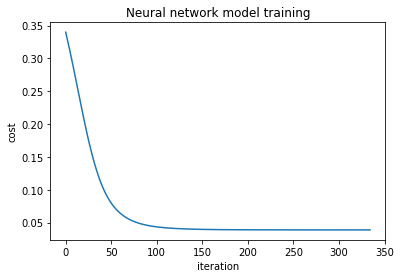

Final cost value: 0.038836


In [63]:
plt.plot(cost_values)
plt.title('Neural network model training')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()
print(f'Final cost value: {round(cost_values[-1], 6)}')

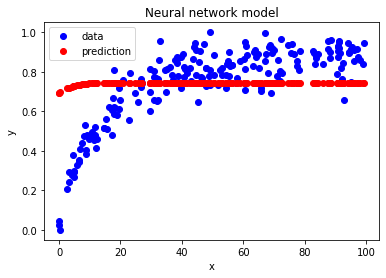

In [64]:
plt.plot(x, y, 'bo', label='data')
plt.plot(x, y_pred.detach().numpy(), 'ro', label='prediction')
plt.title('Neural network model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The gradient descent algorithm seems to get stuck at a local minima.